<a href="https://colab.research.google.com/github/TanmaySDGEEK/HousingPricePredictionModel/blob/main/StockPricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl

In [ ]:
import quandl

In [ ]:
data=quandl.get("NSE/TATAGLOBAL")

In [ ]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


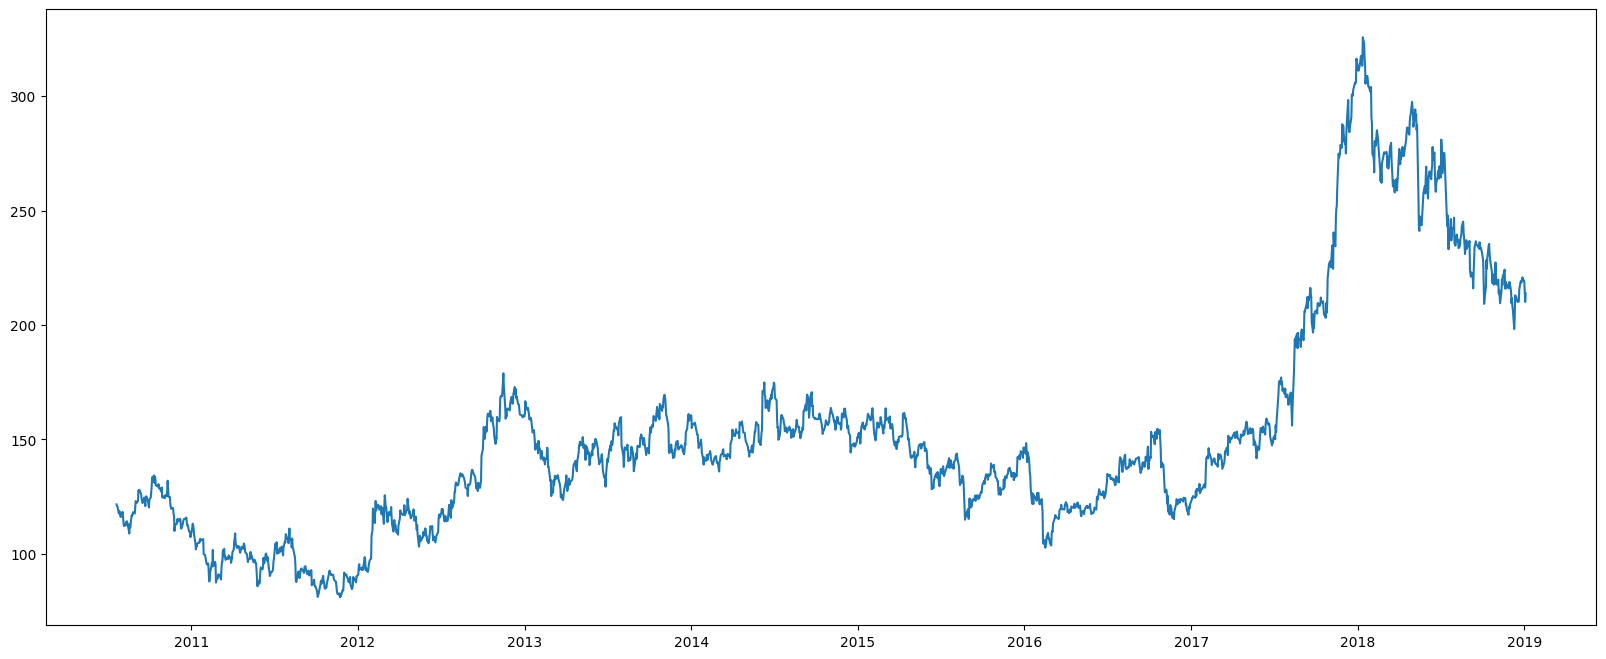

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data['Close'],label='Closing Price')

**Classification**

In [ ]:
data['Open -Close']=data['Open']-data['Close']
data['High-Low']=data['High']-data['Low']
data=data.dropna()

In [ ]:
X=data[['Open -Close','High-Low']]
X.head()

,Open -Close,High-Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [ ]:
Y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [ ]:
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [ ]:
from posixpath import split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=44)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

model.fit(X_train,Y_train)
accuracy_train=accuracy_score(Y_train,model.predict(X_train))
accuracy_test=accuracy_score(Y_test,model.predict(X_test))

print(accuracy_train)
print(accuracy_test)


0.6755555555555556
0.5066666666666667


In [ ]:
predicted=model.predict(X_test)

In [ ]:
actual_predicted_data=pd.DataFrame({'Actual class':Y_test,'predicted class':predicted})

In [ ]:
Y=data['Close']

In [ ]:
actual_predicted_data.head(10)

,Actual class,predicted class
0,-1,1
1,1,1
2,1,-1
3,1,1
4,-1,-1
5,-1,-1
6,-1,1
7,-1,-1
8,-1,1
9,1,-1
